In [76]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from sklearn.decomposition import PCA


In [2]:
#build the 3d dataset
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [5]:
X[0:5]

array([[-1.01570027, -0.55091331, -0.26132626],
       [-0.00771675,  0.59958572,  0.03507755],
       [-0.95317135, -0.46453691, -0.24920288],
       [-0.92012304,  0.21009593,  0.02182381],
       [-0.76309739,  0.158261  ,  0.19152496]])

In [41]:
np.ravel(X[:,2]).shape

(60,)

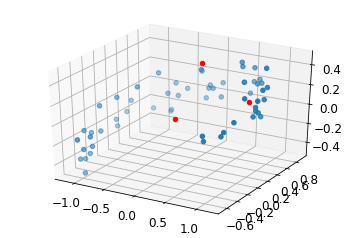

In [113]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.ravel(X[:,0]), np.ravel(X[:,1]), np.ravel(X[:,2]))
ax.scatter(c1[0], c1[1], c1[2], c='r')
ax.scatter(c2[0], c2[1], c2[2], c='r')
ax.scatter(0,0,0, c='r')

In [61]:
#produce first two PCs
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
c3 = Vt.T[:, 2]

In [104]:
c1[0]

0.9363611575673841

In [60]:
c2

array([-0.34027485,  0.90119108,  0.2684542 ])

In [62]:
c3

array([-0.08626012, -0.31420255,  0.94542898])

In [74]:
#projecting the data onto PCs
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)
X2D_using_svd = X2D

In [117]:
X2D[0:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

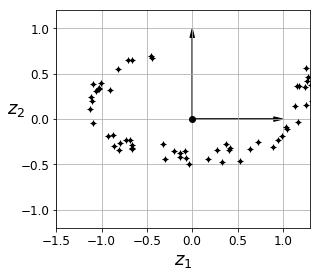

In [125]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)

In [77]:
#PCA using scikit learn
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

In [78]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [79]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [82]:
np.allclose(-X2D, X2D_using_svd)

True

In [143]:
pca.components_.T

array([[-0.93636116,  0.34027485],
       [-0.29854881, -0.90119108],
       [-0.18465208, -0.2684542 ]])

In [89]:
W2

array([[ 0.93636116, -0.34027485],
       [ 0.29854881,  0.90119108],
       [ 0.18465208,  0.2684542 ]])

In [90]:
np.allclose(W2, -pca.components_.T)

True

In [91]:
#Recover the 3D points projected on the plane
X3D_inv = pca.inverse_transform(X2D)
#reconstruction error
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.01017033779284855

In [92]:
pca.explained_variance_ratio_
#The first dimension explains 84.2% of the variance, 
#while the second explains 14.6%.

array([0.84248607, 0.14631839])

In [114]:
1 - pca.explained_variance_ratio_.sum()
#By projecting down to 2D, we lost about 1.1% of the variance

0.011195535570688975

In [115]:
np.square(s) / np.square(s).sum()

array([0.84248607, 0.14631839, 0.01119554])

In [138]:
#set explained variance ratio to 95%
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [144]:
pca.components_.T

array([[-0.93636116,  0.34027485],
       [-0.29854881, -0.90119108],
       [-0.18465208, -0.2684542 ]])